In [1]:
%matplotlib inline

#Dependencies

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

#Load CSV

city_data_df = pd.read_csv("Resources/city_data.csv")
ride_data_df = pd.read_csv("Resources/ride_data.csv")

In [2]:
city_data_df

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [3]:
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [4]:
city_data_df.columns

Index(['city', 'driver_count', 'type'], dtype='object')

In [5]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [13]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [15]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [39]:
# # get the count of cities
# city_count_df = []

# for i in city_data_df["city"]:
#     city_count_df["city"] =i

In [31]:
# Get the number of data points from the Urban cities.
sum(city_data_df["type"] == "Rural")

18

In [40]:
ride_data_df

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277


In [44]:
ride_data_df.columns


Index(['city', 'date', 'fare', 'ride_id'], dtype='object')

In [8]:
#Merge your DataFrames.
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])
pyber_data_df.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


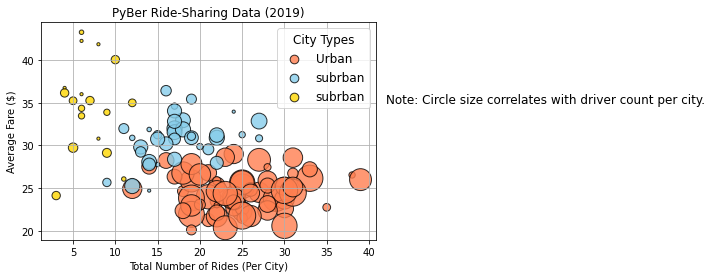

<Figure size 432x288 with 0 Axes>

In [78]:
# Create a bubble chart that showcases the average fare versus the total number of rides with bubble size 
# based on the total number of drivers for each city type, including urban, suburban, and rural.

# create the urban city dataframe
urban_cities_df =  pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df =  pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df =  pyber_data_df[pyber_data_df["type"] == "Rural"]

#count per city per for a given type - this made the xaxis
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

#Get average fare for each citytype
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

plt.scatter(urban_ride_count, 
            urban_avg_fare,
            s=10 *urban_driver_count,
            c="coral",
            edgecolor="black", 
            linewidths=1,
            alpha=0.8,  
            label="Urban")



plt.scatter(suburban_ride_count, 
            suburban_avg_fare,
            s=10 *suburban_driver_count,
            c="skyblue",
            edgecolor="black", 
            linewidths=1,
            alpha=0.8,  
            label="subrban")



plt.scatter(rural_ride_count, 
            rural_avg_fare,
            s=10 *rural_driver_count,
            c="gold",
            edgecolor="black", 
            linewidths=1,
            alpha=0.8,  
            label="subrban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
# Add the legend.
# Create a legend


#in place of plt.legend()
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")
plt.show()

# Save the figure.
plt.savefig("Analysis/Fig1.png")

In [10]:
# Determine the mean, median, and mode for the following:
# The total number of rides for each city type.
# The average fares for each city type.
# The total number of drivers for each city type.



In [11]:
# Create box-and-whisker plots that visualize each of the following to determine if there are any outliers:
# The number of rides for each city type.
# The fares for each city type.
# The number of drivers for each city type.



In [12]:
# Create a pie chart that visualizes each of the following data for each city type:
# The percent of total fares.
# The percent of total rides.
# The percent of total drivers.

